In [40]:
from dtw import dtw
import pandas_datareader.data as web
import numpy as np
from numpy.linalg import norm
from numpy import array
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import seaborn as sns

In [41]:
from cluster_feature import ClusterFeature

In [42]:
PICKLE_FILE_NAME = './data/feature_train_data.pickle'
CF = ClusterFeature(PICKLE_FILE_NAME)
print('feature shape: {}'.format(CF.df_f_list.shape))
print('tip of a feature:\n {}'.format(CF.df_f_list.head(3)))


feature shape: (1115, 13)
tip of a feature:
    std_idx           m1           m2           m3           m4           m5  \
0        0  4703.166667  4414.192308  5067.607843  6248.857143  4754.722222   
1        1  5228.948718  5374.384615  5790.039216  6417.163265  5345.958333   
2        2  7580.894737  7212.884615  7917.640000  9427.333333  7389.555556   

            m6           m7           m8           m9          m10  \
0  4942.246753  4711.726027  4805.070423  4538.726027  4591.382716   
1  5489.909091  5602.301370  5786.250000  5772.960000  5640.592593   
2  7781.090909  8001.287671  8435.718310  8038.506849  9327.894737   

           m11          m12  
0  4326.867925  4220.882353  
1  5210.245283  5281.764706  
2  7837.115385  7171.840000  


In [43]:
x_df = CF.df_f_list.iloc[0,1:]
x = np.array(x_df).reshape(-1,1)
y_df = CF.df_f_list.iloc[1,1:] 
y = np.array(y_df).reshape(-1,1)

In [44]:
print(x.shape, y.shape)

(12, 1) (12, 1)


In [45]:
dist, cost, acc, path = dtw(x,y, dist=lambda x, y: norm(x-y, ord=1))

In [51]:
print("dist: ", dist)
print("cost: ", cost)
print("acc: ", acc)
print("path: ", path)

dist:  396.36650886197293
cost:  [[ 525.78205128  671.21794872 1086.87254902 1713.99659864  642.79166667
   786.74242424  899.1347032  1083.08333333 1069.79333333  937.42592593
   507.07861635  578.59803922]
 [ 814.75641026  960.19230769 1375.84690799 2002.97095761  931.76602564
  1075.71678322 1188.10906217 1372.05769231 1358.76769231 1226.4002849
   796.05297533  867.57239819]
 [ 161.34087481  306.77677225  722.43137255 1349.55542217  278.3504902
   422.30124777  534.69352673  718.64215686  705.35215686  572.98474946
   142.63743988  214.15686275]
 [1019.90842491  874.47252747  458.81792717  168.30612245  902.89880952
   758.94805195  646.55577299  462.60714286  475.89714286  608.26455026
  1038.61185984  967.09243697]
 [ 474.22649573  619.66239316 1035.31699346 1662.44104308  591.23611111
   735.18686869  847.57914764 1031.52777778 1018.23777778  885.87037037
   455.5230608   527.04248366]
 [ 286.7019647   432.13786214  847.79246244 1474.91651206  403.71158009
   547.66233766  660.0

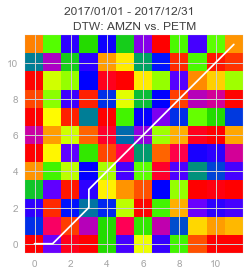

In [46]:
# Set Seaborn style for plots:
sns.set_style("whitegrid", {'font_scale':0.5,
                           'font.scale':0.5,
                           'xtick.color':'#A5A5A5',
                           'ytick.color':'#A5A5A5',
                           'axes.linewidth': 0.2,
                           'axes.facecolor': '#AEAEAE',
                           'text.color': '#424242',
                           'legend.frameon': True})

plt.title('DTW: %s vs. %s' % (x_tick, y_tick))# The 2 symbols being compared.
plt.suptitle("%s - %s" %(start.strftime("%Y/%m/%d"), end.strftime("%Y/%m/%d"))) # Show start/end dates.
# acc.T is the accumulated cost matrix returned from the dtw( ) function.
# origin is which part of the chart to start the plot.
# cmap is shorthand for color map. The 'prism' palette is particularly useful for visualizing DTW outputs.
plt.imshow(acc.T, origin='lower', cmap='prism', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlim((-0.5, acc.shape[0]-0.5))
plt.ylim((-0.5, acc.shape[1]-0.5))

plt.show()
plt.clf() # Clear the current figure in-case we want to generate or try a different plot.

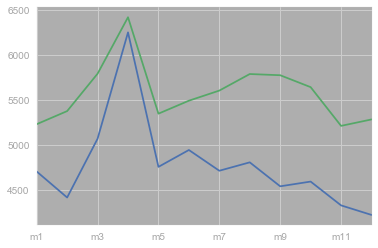

In [49]:
x_df.plot()
y_df.plot()